## 전처리(preprocess)
    - 정형데이터 기준:

In [20]:
import pandas as pd
df_rentalCars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalCars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


### 이상치 처리
    -확인 :Boxplot확인, IQR 4분위 사용
    -처리 : filtering
    

<Axes: xlabel='age'>

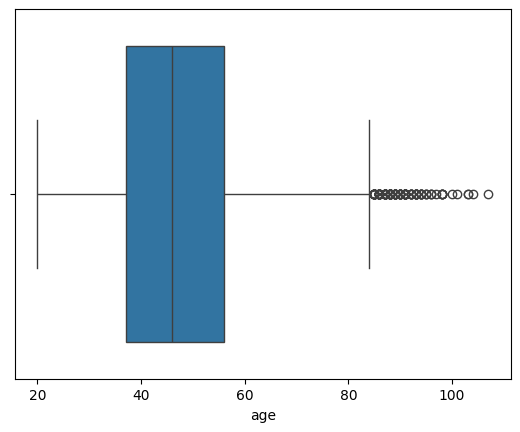

In [21]:
import seaborn as sns
sns.boxplot(data=df_rentalCars, x='age')

#### 4분위 공식
- Min = Q1 - 1.5 * IQR
- Max = Q3 + 1.5 * IQR

In [22]:
# from DataFrame
df_rentalCars_describe = df_rentalCars.describe()
# type(df_rentalcars_describe)
df_rentalCars_describe

,id,Term,amount,overdue_count,credit rating,age,Mileage
count,5.130400e+04,51304.000000,51304.000000,51304.000000,42521.000000,40509.000000,40509.000000
mean,6.266457e+07,55.638527,93994.980021,0.161040,3.428894,46.608285,1967.922412
std,1.216115e+07,12.010117,15305.147334,1.122356,2.213590,13.465977,436.707329
min,2.568798e+07,12.000000,54603.000000,-1.000000,0.000000,20.000000,872.000000
25%,6.643149e+07,60.000000,81900.000000,0.000000,1.000000,37.000000,1646.000000
50%,6.676578e+07,60.000000,96900.000000,0.000000,3.000000,46.000000,1946.000000
75%,6.678161e+07,60.000000,98400.000000,0.000000,5.000000,56.000000,2263.000000
max,6.696986e+07,60.000000,215700.000000,15.000000,10.000000,107.000000,3803.000000


In [25]:
Q1 = df_rentalCars_describe.loc['25%', 'age']
Q3 = df_rentalCars_describe.loc['75%', 'age']
IQR = Q3 - Q1
Q1, Q3, IQR

(37.0, 56.0, 19.0)

In [26]:
bound_max = Q3 + 1.5 * IQR
bound_min = Q1 - 1.5 * IQR
bound_max, bound_min


(84.5, 8.5)

In [28]:
conditions = df_rentalCars['age'] <= bound_max
df_rentalCars_withoutlier = df_rentalCars[conditions]
df_rentalCars_withoutlier
shape

0         True
1         True
2         True
3         True
4         True
         ...  
51299    False
51300     True
51301     True
51302     True
51303     True
Name: age, Length: 51304, dtype: bool

In [30]:
sns.boxplot(data = df_rentalCars_withoutlier, x='age')

NameError: name 'df_rentalCars_withoutlier' is not defined

In [32]:
# with numpy
import numpy as np
df_rentalCars.dropna(inplace=True)
np.percentile(df_rentalCars['age'], 75) # without Null data

56.0